In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# reading dataset 
file = "C:/Users/20201954/Desktop/data/quantitative MRI.xlsx"
df = pd.read_excel(file)

numerical_df = df.select_dtypes(include=[float, int])
non_numerical_df = df.select_dtypes(exclude=[float, int]) 
df = numerical_df

C:\Users\20201954\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
# Remove rows with any 0 values
df_filtered = df[(df != 0).all(axis=1)]
print(df_filtered)
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_filtered.shape}")
df = df_filtered

      subjectID  session  sessionID  muscleID  sideID    volume    trk_leng  \
0             1        1          1         1       1  225.5715  128.312424   
1             1        1          1         1       2  217.0665   74.680931   
2             1        1          1         2       1  445.9185   98.776443   
3             1        1          1         2       2  456.3810   87.850719   
4             1        1          1         3       1  641.4390  110.342781   
...         ...      ...        ...       ...     ...       ...         ...   
4735         79        1          1        30       2  266.0040  110.335335   
4736         79        1          1        31       1  164.1870  126.894844   
4737         79        1          1        31       2  164.7675  114.113464   
4738         79        1          1        32       1   54.7290   62.525448   
4739         79        1          1        32       2   68.1210   78.812187   

        trk_ang  trk_seed  trk_dens  ...   dti_snr0

In [3]:
df = df.drop(columns=['subjectID', 'session', 'sessionID', 'muscleID', 'sideID', 'volume', 'trk_leng', 'trk_ang'])
df.head()

,trk_seed,trk_dens,dti_l1,dti_l2,dti_l3,dti_md,dti_rd,dti_fa,dti_adci,dti_fri,dti_snr0,dix_watfr,dix_fatfr,dix_t2star,dix_r2star,dix_snr,dix_dbond,t2_fatfr,t2_t2w,t2_t2f
0,0.363608,1.547397,1.755076,1.296643,1.118196,1.385661,1.205056,0.218869,1.381021,0.044240,21.864636,0.988031,1.196883,31.124536,32.360153,72.005936,11.016443,6.893448,29.766680,218.154770
1,0.292484,0.862784,1.674851,1.270722,1.088295,1.333043,1.176370,0.219142,1.332976,0.038219,26.351746,0.986770,1.323004,24.200849,41.488840,55.315876,8.083123,6.579949,28.542535,188.994987
2,0.361483,1.201093,1.747564,1.318626,1.200244,1.422549,1.259057,0.205252,1.420225,0.039611,24.654427,0.981818,1.818241,28.298574,35.659748,65.425865,10.307537,8.156445,30.253475,211.003571
3,0.356667,1.070751,1.727356,1.307701,1.196663,1.412093,1.251865,0.203801,1.413748,0.035045,25.463583,0.983509,1.649060,25.391251,39.659378,65.230667,7.816146,7.977058,29.786484,204.876495
4,0.369861,1.960575,1.778001,1.367932,1.214833,1.457258,1.292251,0.195484,1.459163,0.036267,26.109089,0.961433,3.856707,27.586838,36.733351,73.749279,10.102497,10.879514,30.962922,213.111839


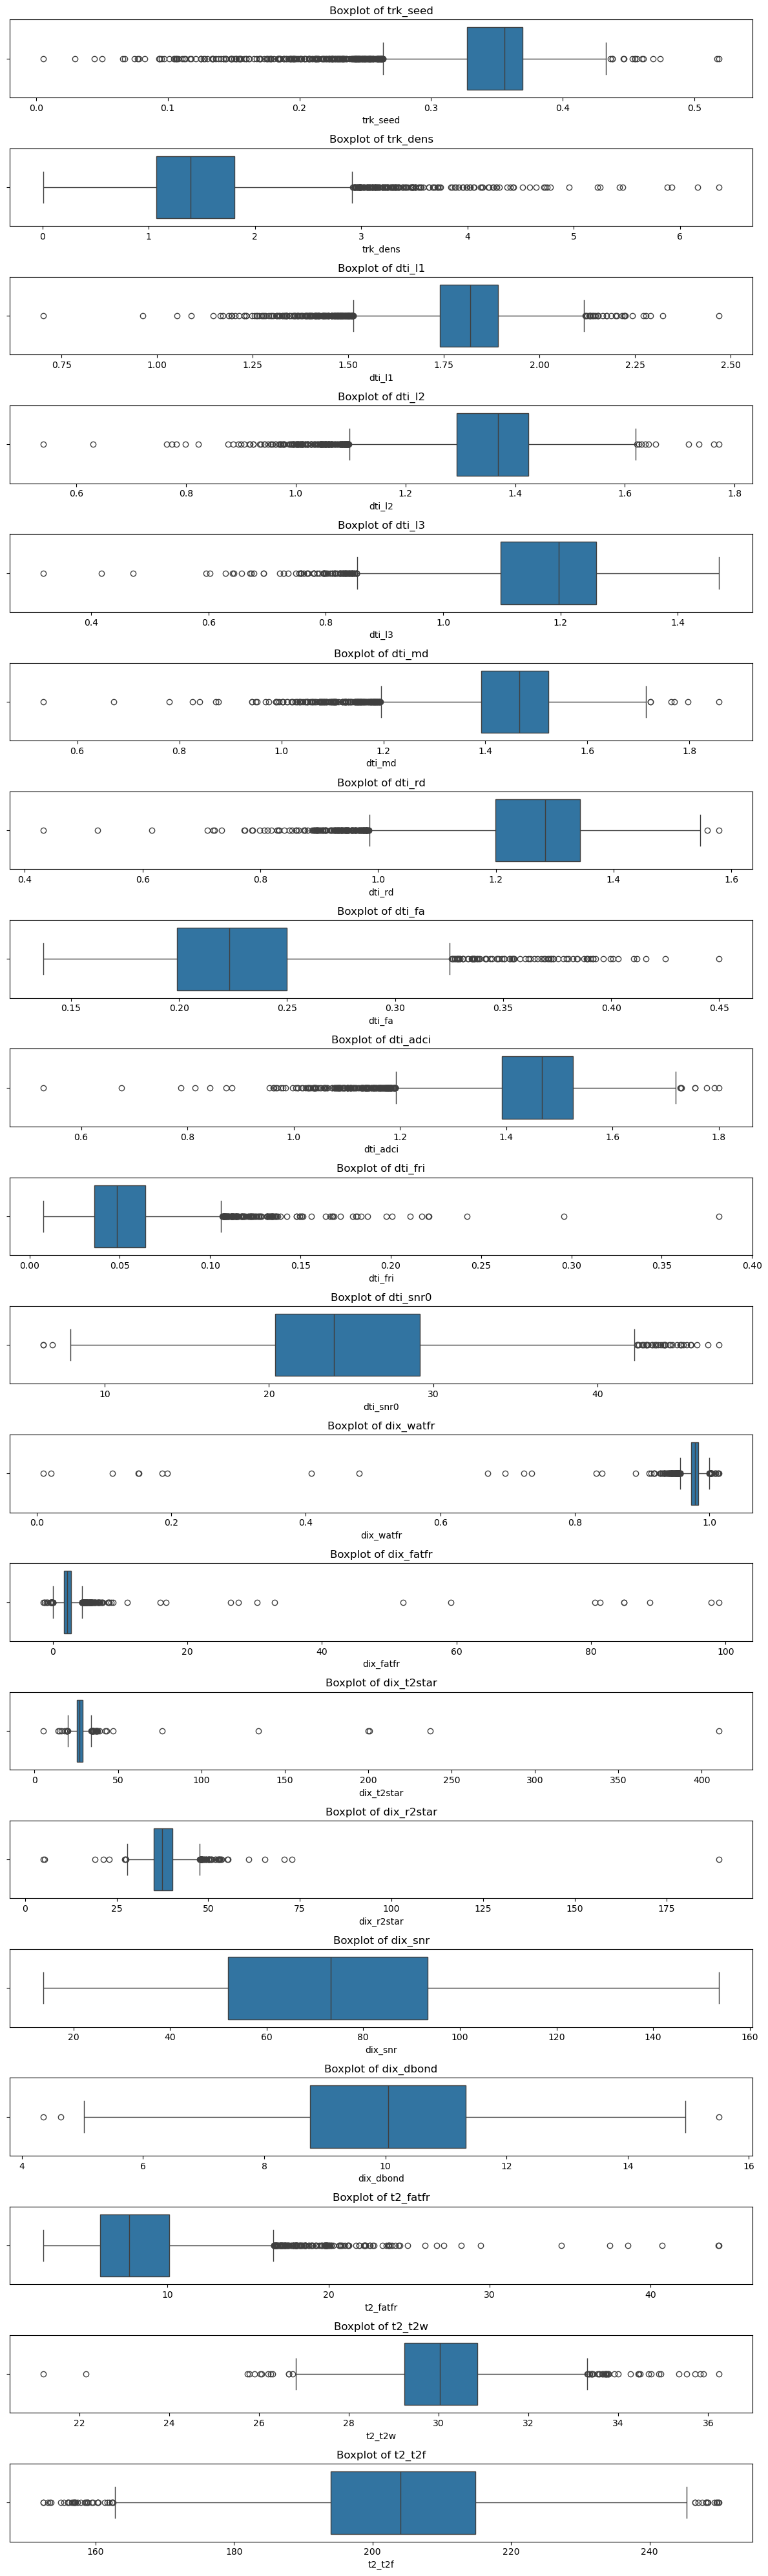

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots for each feature
plt.figure(figsize=(12, len(df.columns) * 2))

for i, column in enumerate(df.columns, 1):
    plt.subplot(len(df.columns), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [5]:
def remove_outliers_iqr(df):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # Calculate IQR for each column
    IQR = Q3 - Q1
    
    # Filter out rows with outliers
    df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    return df_out

# Apply the function to remove outliers
df_cleaned = remove_outliers_iqr(df)

print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

df = df_cleaned

remaining_indices = df.index
print(df.head())

Original DataFrame shape: (4729, 20)
Cleaned DataFrame shape: (3672, 20)
   trk_seed  trk_dens    dti_l1    dti_l2    dti_l3    dti_md    dti_rd  \
0  0.363608  1.547397  1.755076  1.296643  1.118196  1.385661  1.205056   
1  0.292484  0.862784  1.674851  1.270722  1.088295  1.333043  1.176370   
2  0.361483  1.201093  1.747564  1.318626  1.200244  1.422549  1.259057   
3  0.356667  1.070751  1.727356  1.307701  1.196663  1.412093  1.251865   
4  0.369861  1.960575  1.778001  1.367932  1.214833  1.457258  1.292251   

     dti_fa  dti_adci   dti_fri   dti_snr0  dix_watfr  dix_fatfr  dix_t2star  \
0  0.218869  1.381021  0.044240  21.864636   0.988031   1.196883   31.124536   
1  0.219142  1.332976  0.038219  26.351746   0.986770   1.323004   24.200849   
2  0.205252  1.420225  0.039611  24.654427   0.981818   1.818241   28.298574   
3  0.203801  1.413748  0.035045  25.463583   0.983509   1.649060   25.391251   
4  0.195484  1.459163  0.036267  26.109089   0.961433   3.856707   27.586838

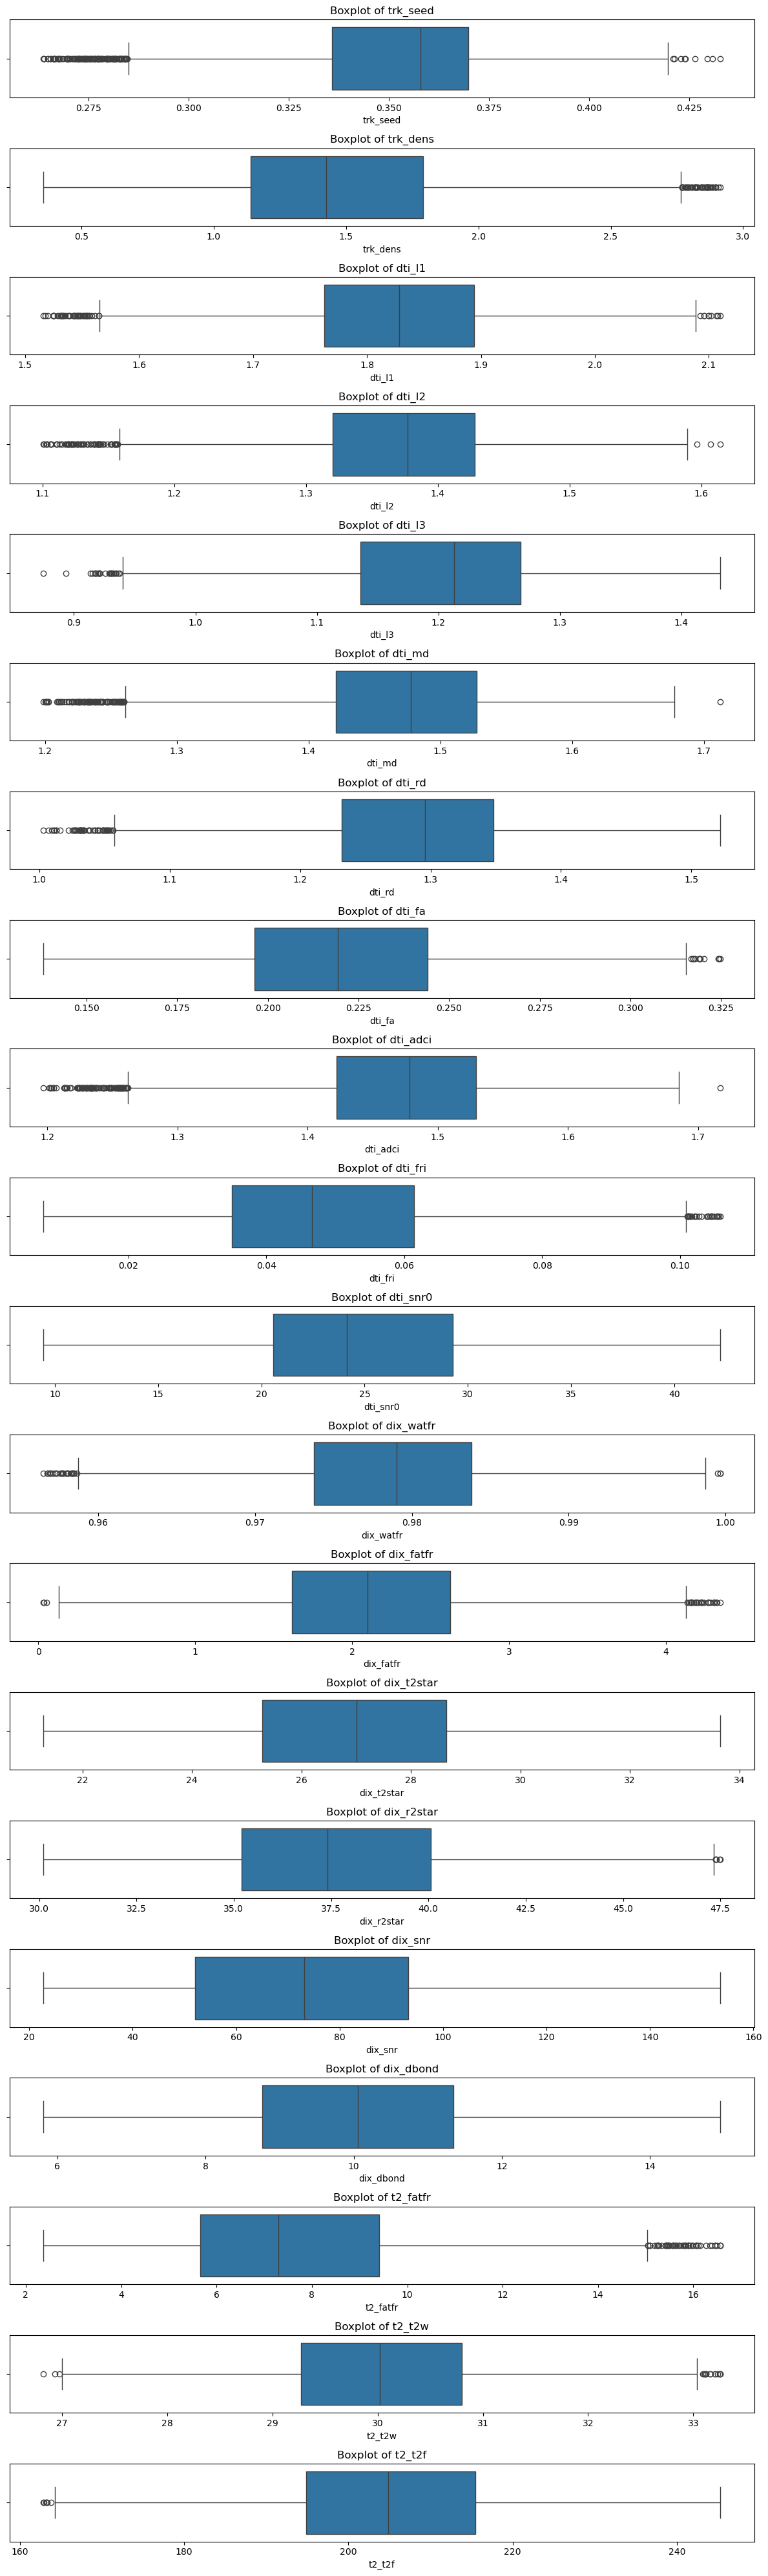

In [6]:
# Create a figure with subplots for each feature
plt.figure(figsize=(12, len(df.columns) * 2))

for i, column in enumerate(df.columns, 1):
    plt.subplot(len(df.columns), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [16]:
# Filter de niet-numerieke kolommen op basis van de overgebleven indices
filtered_non_numerical_df = non_numerical_df.loc[remaining_indices]
# Voeg de dataframes weer samen
final_df = pd.concat([filtered_non_numerical_df, numerical_df ], axis=1)
print(final_df.head())


     subject                 muscle   side  subjectID  session  sessionID  \
0  MOTION001  Lateral_Gastrocnemius   Left          1        1          1   
1  MOTION001  Lateral_Gastrocnemius  Right          1        1          1   
2  MOTION001   Medial_Gastrocnemius   Left          1        1          1   
3  MOTION001   Medial_Gastrocnemius  Right          1        1          1   
4  MOTION001                 Soleus   Left          1        1          1   

   muscleID  sideID    volume    trk_leng  ...   dti_snr0  dix_watfr  \
0         1       1  225.5715  128.312424  ...  21.864636   0.988031   
1         1       2  217.0665   74.680931  ...  26.351746   0.986770   
2         2       1  445.9185   98.776443  ...  24.654427   0.981818   
3         2       2  456.3810   87.850719  ...  25.463583   0.983509   
4         3       1  641.4390  110.342781  ...  26.109089   0.961433   

   dix_fatfr  dix_t2star  dix_r2star    dix_snr  dix_dbond   t2_fatfr  \
0   1.196883   31.124536   32.3

In [8]:
# Controleer de vorm van het resultaat
df = final_df.dropna(inplace = True)
print(final_df.shape)
print(final_df)


(3672, 31)
        subject                 muscle   side  subjectID  session  sessionID  \
0     MOTION001  Lateral_Gastrocnemius   Left          1        1          1   
1     MOTION001  Lateral_Gastrocnemius  Right          1        1          1   
2     MOTION001   Medial_Gastrocnemius   Left          1        1          1   
3     MOTION001   Medial_Gastrocnemius  Right          1        1          1   
4     MOTION001                 Soleus   Left          1        1          1   
...         ...                    ...    ...        ...      ...        ...   
4732  MOTION079        Vastus_Medialis   Left         79        1          1   
4733  MOTION079        Vastus_Medialis  Right         79        1          1   
4735  MOTION079         Rectus_Femoris  Right         79        1          1   
4738  MOTION079              Pectineus   Left         79        1          1   
4739  MOTION079              Pectineus  Right         79        1          1   

      muscleID  sideID    vo

In [9]:
# volume, angle and length are obvious parameters
final_df = final_df.drop(columns=['volume', 'trk_leng', 'trk_ang'])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 4739
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subject     3672 non-null   object 
 1   muscle      3672 non-null   object 
 2   side        3672 non-null   object 
 3   subjectID   3672 non-null   int64  
 4   session     3672 non-null   int64  
 5   sessionID   3672 non-null   int64  
 6   muscleID    3672 non-null   int64  
 7   sideID      3672 non-null   int64  
 8   trk_seed    3672 non-null   float64
 9   trk_dens    3672 non-null   float64
 10  dti_l1      3672 non-null   float64
 11  dti_l2      3672 non-null   float64
 12  dti_l3      3672 non-null   float64
 13  dti_md      3672 non-null   float64
 14  dti_rd      3672 non-null   float64
 15  dti_fa      3672 non-null   float64
 16  dti_adci    3672 non-null   float64
 17  dti_fri     3672 non-null   float64
 18  dti_snr0    3672 non-null   float64
 19  dix_watfr   3672 non-null   floa

In [10]:
# determining the name of the file
file_name = "C:/Users/20201954/Desktop/data/cleaned_qMRI.xlsx"

# saving the excel
final_df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')



DataFrame is written to Excel File successfully.


In [13]:
# file with only numerical data and muscle id

final_df1 = final_df.drop(columns=['subject', 'muscle', 'side', 'subjectID', 'session', 'sessionID', 'sideID'])
final_df1.head()

,muscleID,trk_seed,trk_dens,dti_l1,dti_l2,dti_l3,dti_md,dti_rd,dti_fa,dti_adci,...,dti_snr0,dix_watfr,dix_fatfr,dix_t2star,dix_r2star,dix_snr,dix_dbond,t2_fatfr,t2_t2w,t2_t2f
0,1,0.363608,1.547397,1.755076,1.296643,1.118196,1.385661,1.205056,0.218869,1.381021,...,21.864636,0.988031,1.196883,31.124536,32.360153,72.005936,11.016443,6.893448,29.766680,218.154770
1,1,0.292484,0.862784,1.674851,1.270722,1.088295,1.333043,1.176370,0.219142,1.332976,...,26.351746,0.986770,1.323004,24.200849,41.488840,55.315876,8.083123,6.579949,28.542535,188.994987
2,2,0.361483,1.201093,1.747564,1.318626,1.200244,1.422549,1.259057,0.205252,1.420225,...,24.654427,0.981818,1.818241,28.298574,35.659748,65.425865,10.307537,8.156445,30.253475,211.003571
3,2,0.356667,1.070751,1.727356,1.307701,1.196663,1.412093,1.251865,0.203801,1.413748,...,25.463583,0.983509,1.649060,25.391251,39.659378,65.230667,7.816146,7.977058,29.786484,204.876495
4,3,0.369861,1.960575,1.778001,1.367932,1.214833,1.457258,1.292251,0.195484,1.459163,...,26.109089,0.961433,3.856707,27.586838,36.733351,73.749279,10.102497,10.879514,30.962922,213.111839


In [14]:
# determining the name of the file
file_name = "C:/Users/20201954/Desktop/data/cleaned_qMRI_numerical.xlsx"

# saving the excel
final_df1.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
